In [1]:
from alg.simple import SimpleAlgorithm
from alg.fuzzy import FuzzyAlgorithm
from alg.IRM import IRM_CNN, IRM_MLP
from data.dataset import MNISTDataset
import torch
from torch.utils.data import DataLoader
import numpy as npy
from tqdm import tqdm
from utils import visial
import matplotlib.pyplot as plt

import torch
import numpy as np
import random
import os
 
def setup_seed(seed=3407):
    random.seed(seed)  # Python的随机性
    os.environ['PYTHONHASHSEED'] = str(seed)  # 设置Python哈希种子，为了禁止hash随机化，使得实验可复现
    np.random.seed(seed)  # numpy的随机性
    torch.manual_seed(seed)  # torch的CPU随机性，为CPU设置随机种子
    torch.cuda.manual_seed(seed)  # torch的GPU随机性，为当前GPU设置随机种子
    torch.cuda.manual_seed_all(seed)  # if you are using multi-GPU.   torch的GPU随机性，为所有GPU设置随机种子
    torch.backends.cudnn.deterministic = True # 选择确定性算法
    torch.backends.cudnn.benchmark = False # if benchmark=True, deterministic will be False
    torch.backends.cudnn.enabled = False
setup_seed(3407)

train_dataset = MNISTDataset("./processed_data", "train")
val_dataset = MNISTDataset("./processed_data", "val")
test_dataset = MNISTDataset("./processed_data", "test")

train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True, num_workers=4)
val_loader = DataLoader(dataset=val_dataset, batch_size=64, shuffle=True, num_workers=4)
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False, num_workers=4)

In [3]:
alg_sim = SimpleAlgorithm()
epochs = 5
loss_record = []
acc_record = []
for epoch in range(epochs):
    loss_record.extend(list(alg_sim.train(train_loader)))
    wrong_pred,acc,_ = alg_sim.evaluate(val_loader)
    acc_record.append(acc)
# print(wrong_pred)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 938/938 [00:20<00:00, 46.68it/s]


Accuracy on the val set: 76 %


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 938/938 [00:20<00:00, 46.36it/s]


Accuracy on the val set: 77 %


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 938/938 [00:23<00:00, 40.63it/s]


Accuracy on the val set: 77 %


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 938/938 [00:22<00:00, 41.03it/s]


Accuracy on the val set: 77 %


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 938/938 [00:24<00:00, 38.16it/s]


Accuracy on the val set: 77 %


In [10]:
# loss_record
# loss_record = loss_record[0]
loss_record1 = list(map(float, loss_record))

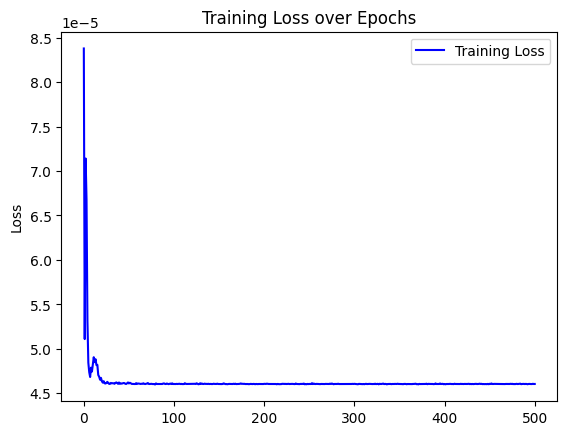

In [11]:
plt.plot(loss_record1, 'b', label='Training Loss')
plt.title('Training Loss over Epochs')
# plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
# plt.show()
plt.savefig("5.png", dpi=1200)

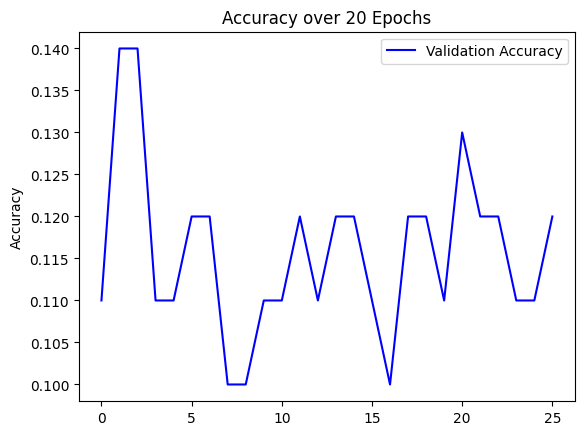

In [12]:
plt.plot(acc_record, 'b', label='Validation Accuracy')
plt.title('Accuracy over 20 Epochs')
# plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
# plt.show()
plt.savefig("6.png", dpi=1200)

[0.6432, 0.6354, 0.6875, 0.6864, 0.7085, 0.6738, 0.6497, 0.6776, 0.6748, 0.7203, 0.7143, 0.7088, 0.6951, 0.6957, 0.6829, 0.6925, 0.6936, 0.7137]


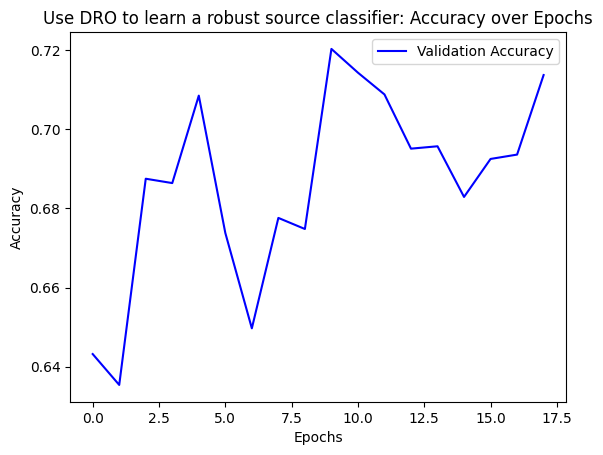

In [34]:
text = """
0.6432
0.6354
0.6875
0.6864
0.7085
0.6738
0.6497
0.6776
0.6748
0.7203
0.7143
0.7088
0.6951
0.6957
0.6829
0.6925
0.6936
0.7137
"""
print(list(map(float, text.split())))

plt.plot(list(map(float, text.split())), 'b', label='Validation Accuracy')
plt.title(prefix + 'Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
# plt.show()
plt.savefig("{}.png".format(str(cnt), dpi=1200))
cnt += 1

In [31]:
# cnt = 13
prefix = "Use DRO to learn a robust source classifier: "

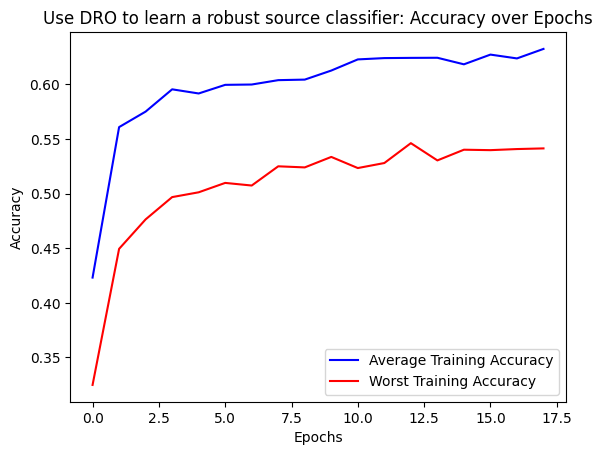

In [32]:
text1 = """
0.4231
0.5609
0.5751
0.5955
0.5917
0.5996
0.5999
0.6039
0.6044
0.6127
0.6229
0.6241
0.6243
0.6244
0.6184
0.6273
0.6238
0.6325
"""
text2 = """
0.3248
0.4494
0.4764
0.4968
0.5012
0.5098
0.5074
0.5250
0.5240
0.5336
0.5234
0.5280
0.5462
0.5304
0.5402
0.5398
0.5408
0.5414
"""
# print(list(map(float, text.split())))

plt.plot(list(map(float, text1.split())), 'b', label='Average Training Accuracy')
plt.plot(list(map(float, text2.split())), 'r', label='Worst Training Accuracy')
plt.title(prefix + 'Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
# plt.show()
plt.savefig("{}.png".format(str(cnt), dpi=1200))
cnt += 1

[0.8876, 0.8892, 0.8706, 0.8612, 0.8842, 0.8768, 0.8656]


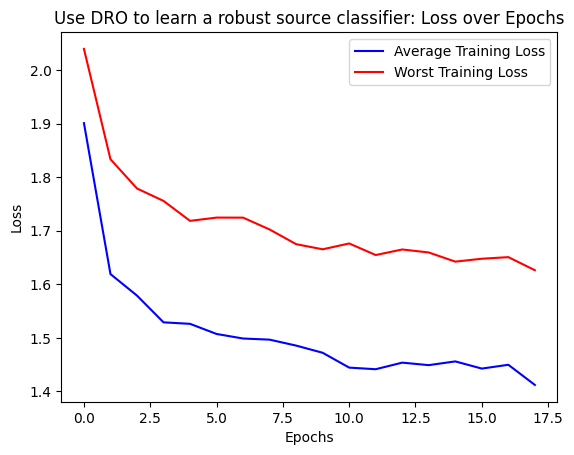

In [33]:
text1 = """
1.9007
1.6190
1.5788
1.5289
1.5261
1.5072
1.4987
1.4966
1.4855
1.4721
1.4444
1.4414
1.4537
1.4490
1.4560
1.4426
1.4497
1.4121
"""
text2 = """
2.0392
1.8333
1.7787
1.7555
1.7183
1.7244
1.7243
1.7022
1.6748
1.6652
1.6761
1.6545
1.6649
1.6593
1.6422
1.6476
1.6506
1.6262
"""
print(list(map(float, text.split())))

plt.plot(list(map(float, text1.split())), 'b', label='Average Training Loss')
plt.plot(list(map(float, text2.split())), 'r', label='Worst Training Loss')
plt.title(prefix + 'Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
# plt.show()
plt.savefig("{}.png".format(str(cnt), dpi=1200))
cnt += 1

pred label:  tensor(1) ,  true_label tensor(8)


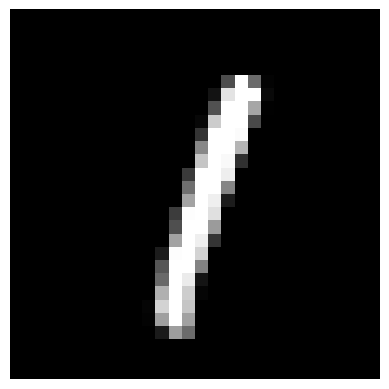

pred label:  tensor(6) ,  true_label tensor(1)


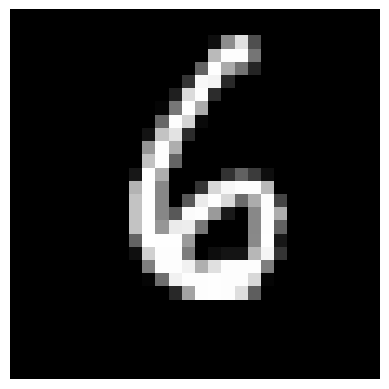

pred label:  tensor(1) ,  true_label tensor(9)


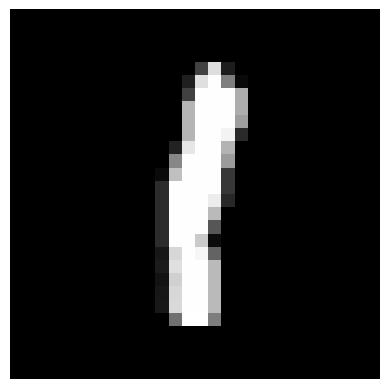

pred label:  tensor(8) ,  true_label tensor(5)


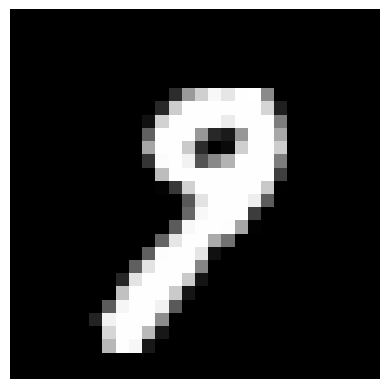

pred label:  tensor(3) ,  true_label tensor(2)


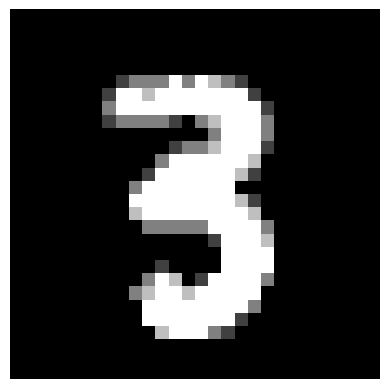

pred label:  tensor(8) ,  true_label tensor(9)


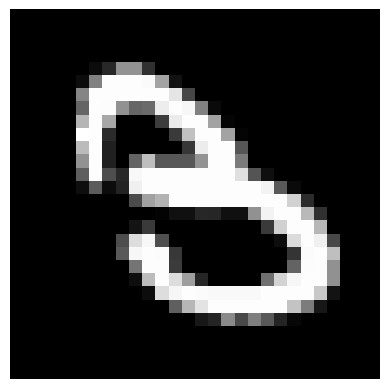

pred label:  tensor(6) ,  true_label tensor(7)


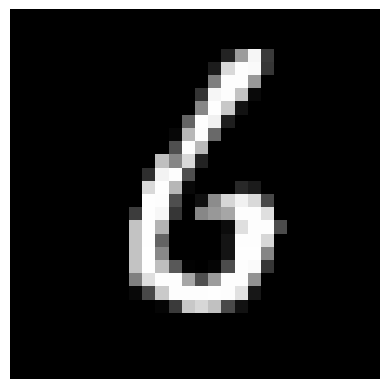

pred label:  tensor(7) ,  true_label tensor(1)


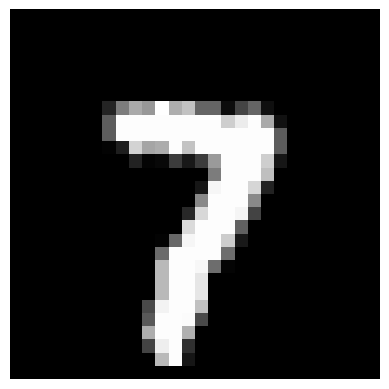

pred label:  tensor(1) ,  true_label tensor(6)


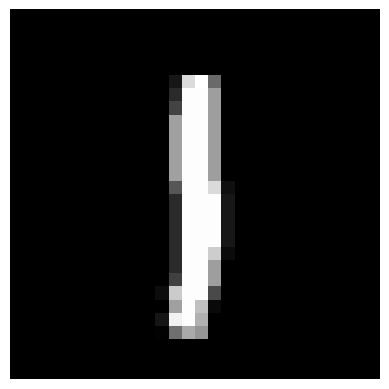

pred label:  tensor(0) ,  true_label tensor(9)


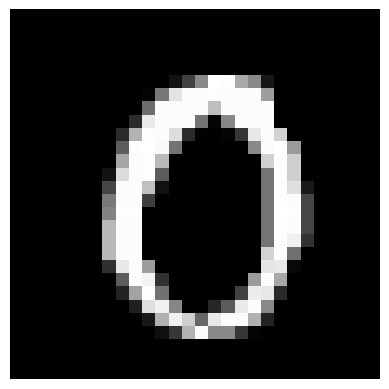

pred label:  tensor(8) ,  true_label tensor(7)


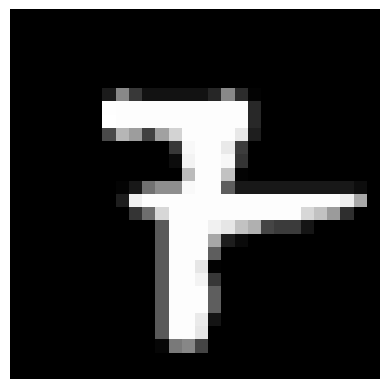

pred label:  tensor(4) ,  true_label tensor(5)


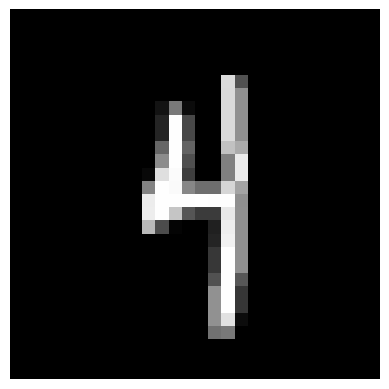

pred label:  tensor(1) ,  true_label tensor(6)


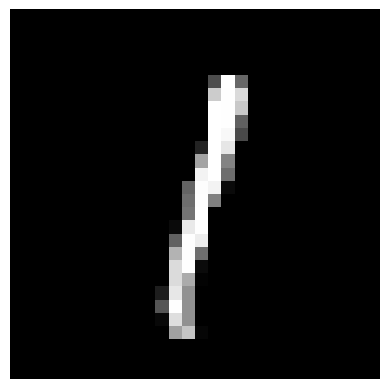

pred label:  tensor(4) ,  true_label tensor(5)


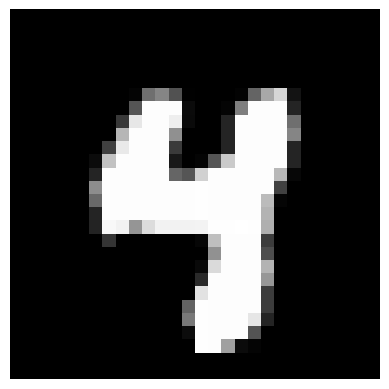

pred label:  tensor(4) ,  true_label tensor(7)


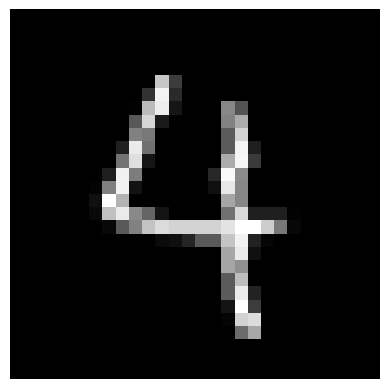

pred label:  tensor(3) ,  true_label tensor(9)


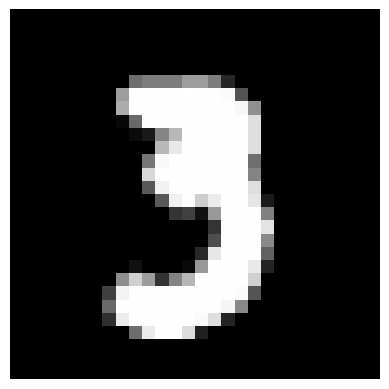

pred label:  tensor(2) ,  true_label tensor(5)


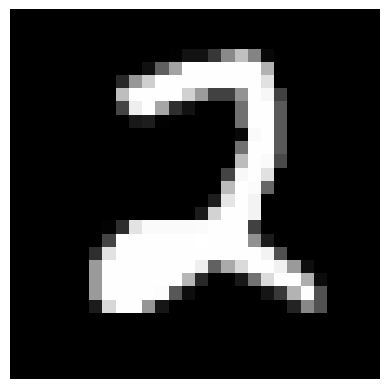

pred label:  tensor(3) ,  true_label tensor(0)


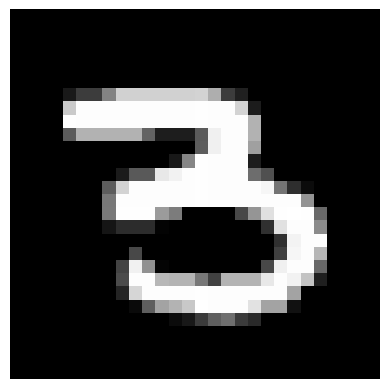

pred label:  tensor(2) ,  true_label tensor(7)


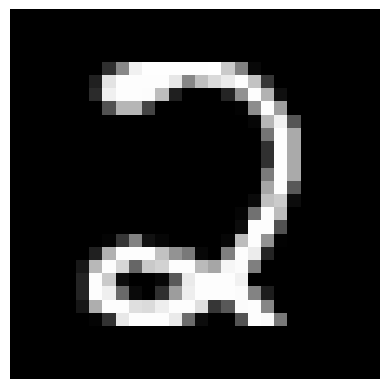

pred label:  tensor(8) ,  true_label tensor(5)


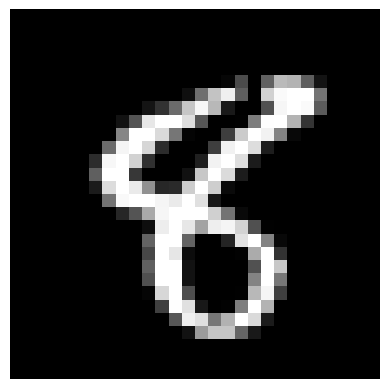

pred label:  tensor(1) ,  true_label tensor(2)


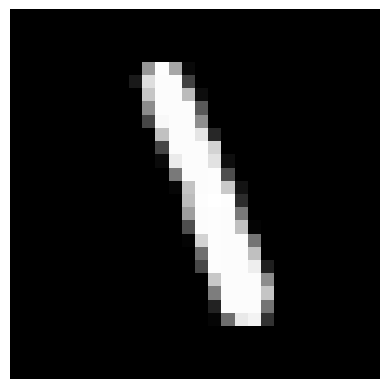

pred label:  tensor(1) ,  true_label tensor(8)


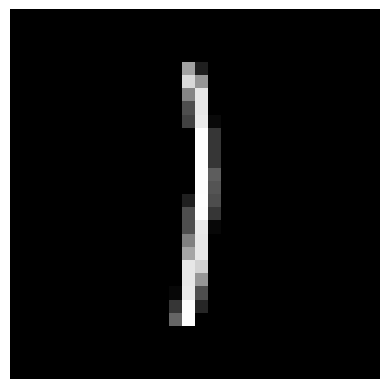

pred label:  tensor(7) ,  true_label tensor(4)


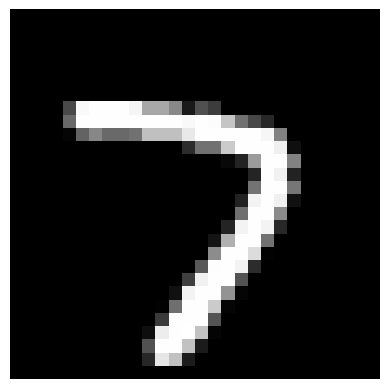

pred label:  tensor(0) ,  true_label tensor(9)


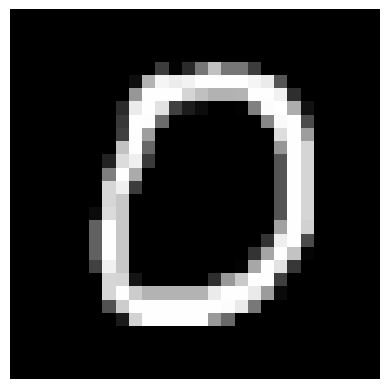

In [5]:
from utils import visial
for fig, label, t_label in zip(data, labels, true_labels):
    print("pred label: ", label, ", ", "true_label", t_label)
    visial(fig)

In [2]:
alg = FuzzyAlgorithm()
loss_record = []
acc_record = []
epochs = 5
for epoch in range(epochs):
    loss_record.append(alg.train(train_loader))
    wrong_pred,acc = alg.evaluate(val_loader)
    acc_record.append(acc)
# loss_record1 = list(map(float, loss_record))

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 938/938 [00:31<00:00, 29.50it/s]


Accuracy on the val set: 76 %


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 938/938 [00:29<00:00, 31.35it/s]


Accuracy on the val set: 77 %


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 938/938 [00:32<00:00, 29.28it/s]


Accuracy on the val set: 77 %


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 938/938 [00:30<00:00, 30.37it/s]


Accuracy on the val set: 76 %


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 938/938 [00:31<00:00, 29.90it/s]


Accuracy on the val set: 76 %


TypeError: float() argument must be a string or a number, not 'list'

In [8]:
out = alg_sim.predict(test_loader)

In [9]:
alg.model

CNN1(
  (conv1): Sequential(
    (0): Conv2d(10, 80, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(80, 160, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv3): Sequential(
    (0): Conv2d(160, 320, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (out): Sequential(
    (0): Linear(in_features=2880, out_features=640, bias=True)
    (1): Linear(in_features=640, out_features=64, bias=True)
    (2): Linear(in_features=64, out_features=10, bias=True)
  )
)

In [4]:
result = []
for i in range(0, len(out), 2):
    result.extend(list(zip(out[i], list(out[i+1]))))

In [5]:
temp = []
for res in result:
    temp.append((res[0].split("/")[-1], res[1]))
result = temp
result

[('2761.npy', 2),
 ('9454.npy', 8),
 ('4164.npy', 1),
 ('8658.npy', 1),
 ('6779.npy', 5),
 ('5559.npy', 0),
 ('3110.npy', 0),
 ('5080.npy', 7),
 ('5517.npy', 4),
 ('7960.npy', 3),
 ('4730.npy', 5),
 ('3351.npy', 7),
 ('5861.npy', 9),
 ('4827.npy', 1),
 ('7023.npy', 1),
 ('1363.npy', 3),
 ('9545.npy', 1),
 ('9011.npy', 2),
 ('1407.npy', 7),
 ('6778.npy', 2),
 ('3673.npy', 2),
 ('2911.npy', 7),
 ('8914.npy', 6),
 ('429.npy', 1),
 ('1174.npy', 4),
 ('846.npy', 7),
 ('5767.npy', 5),
 ('7971.npy', 4),
 ('5460.npy', 7),
 ('4721.npy', 7),
 ('7957.npy', 0),
 ('4405.npy', 9),
 ('5443.npy', 8),
 ('1933.npy', 0),
 ('6356.npy', 1),
 ('7977.npy', 0),
 ('4775.npy', 6),
 ('8651.npy', 9),
 ('4178.npy', 0),
 ('1664.npy', 0),
 ('2433.npy', 3),
 ('7869.npy', 1),
 ('592.npy', 5),
 ('9763.npy', 8),
 ('9646.npy', 7),
 ('924.npy', 4),
 ('3252.npy', 7),
 ('6916.npy', 8),
 ('239.npy', 6),
 ('784.npy', 0),
 ('4227.npy', 0),
 ('2773.npy', 0),
 ('4595.npy', 4),
 ('2721.npy', 0),
 ('9375.npy', 6),
 ('4675.npy', 2)

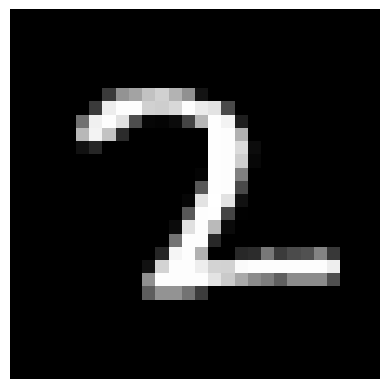

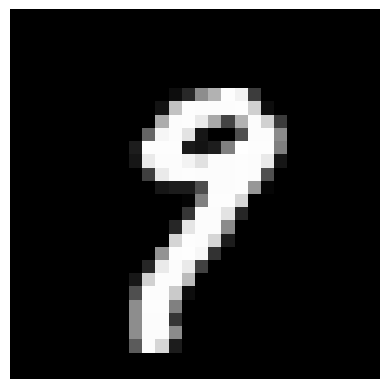

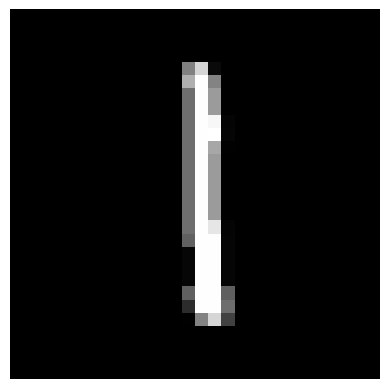

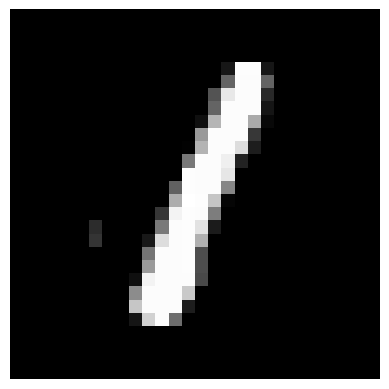

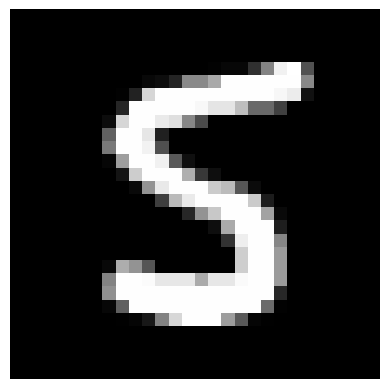

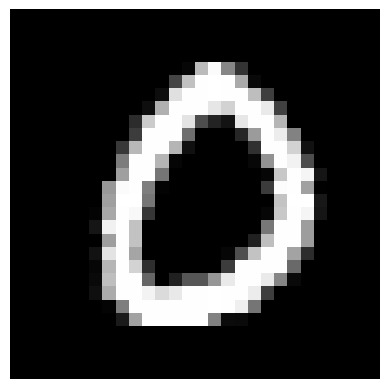

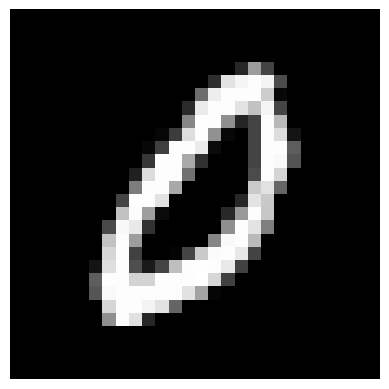

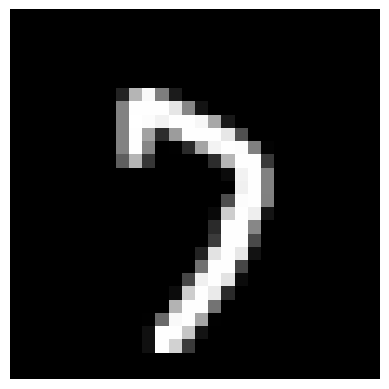

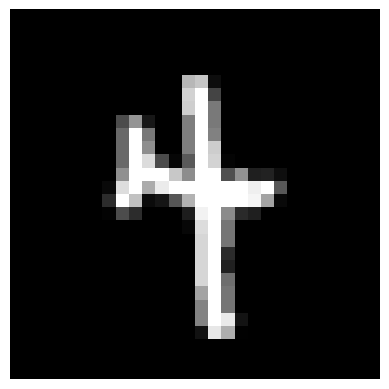

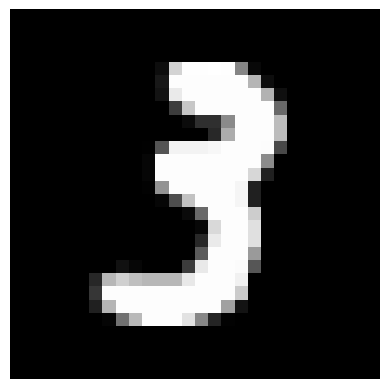

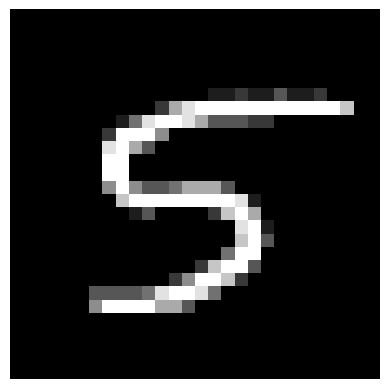

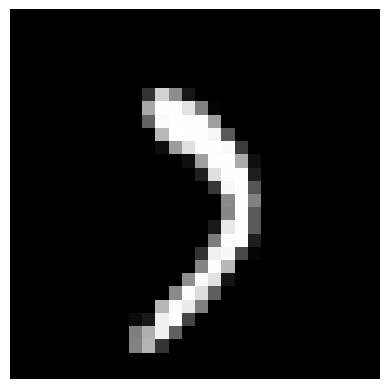

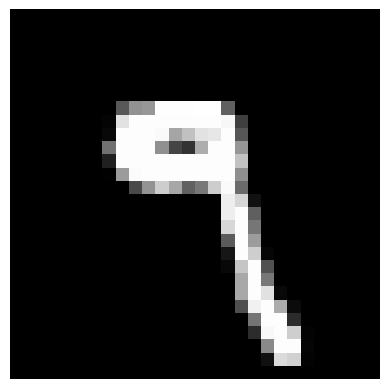

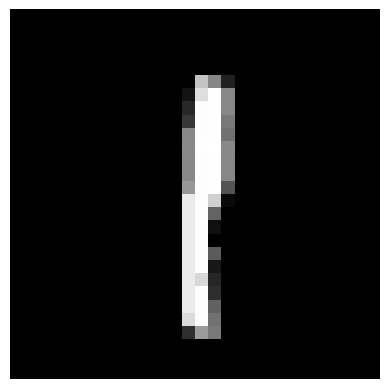

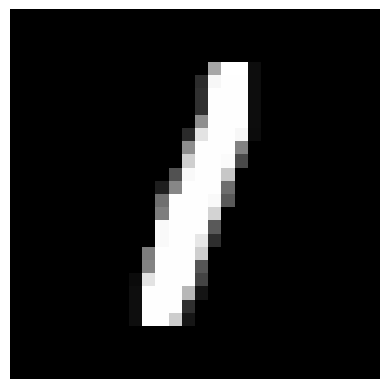

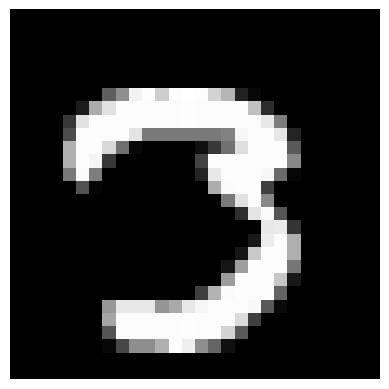

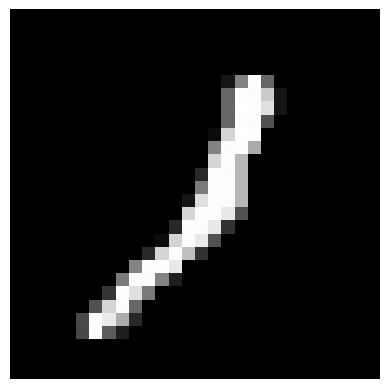

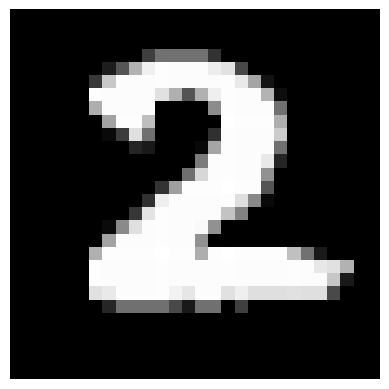

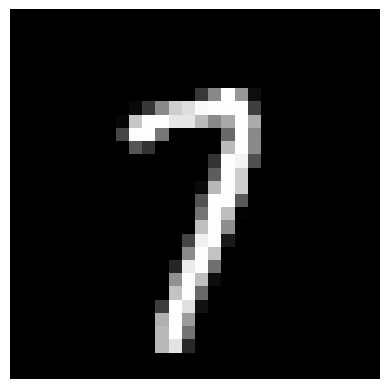

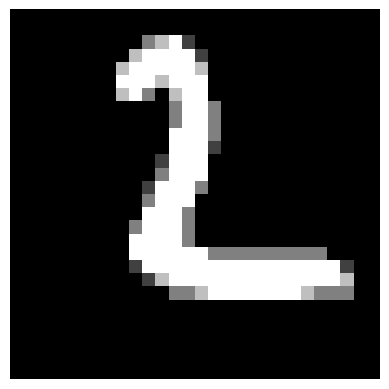

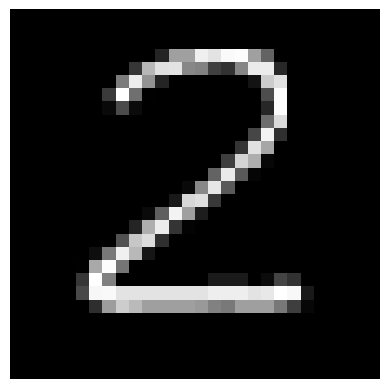

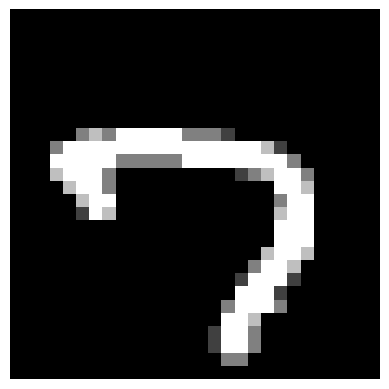

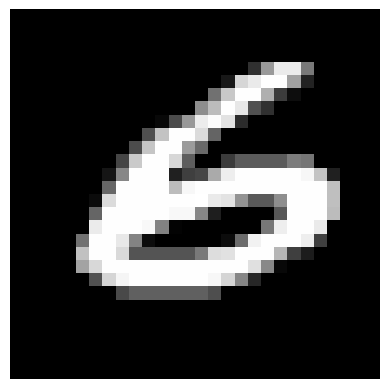

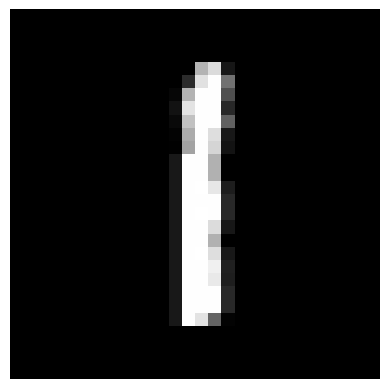

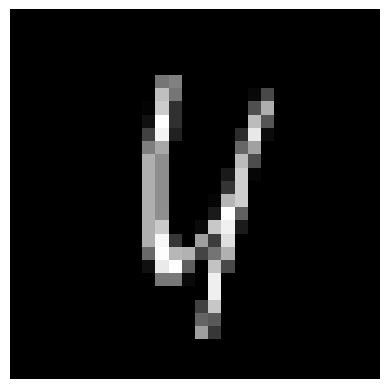

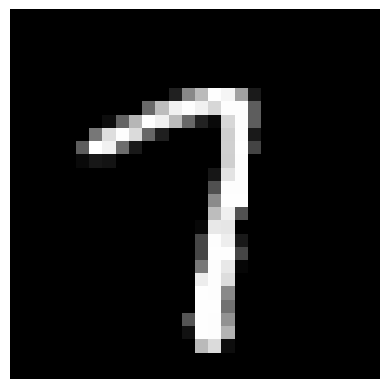

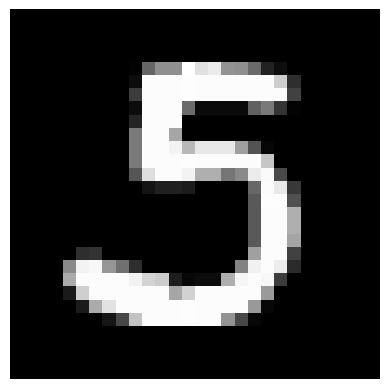

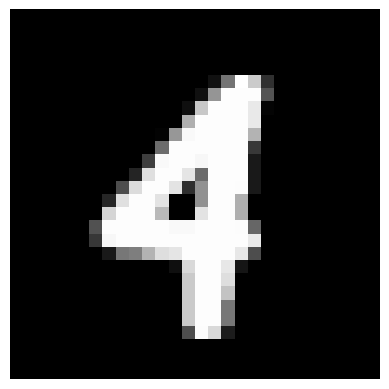

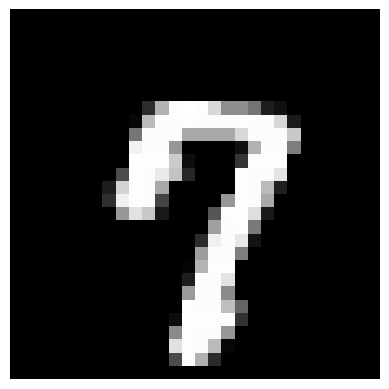

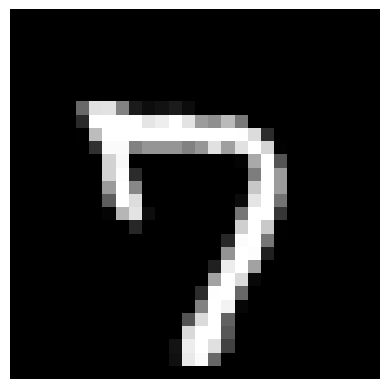

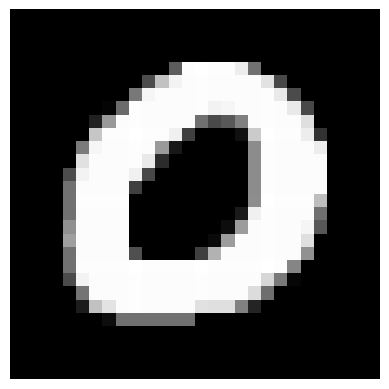

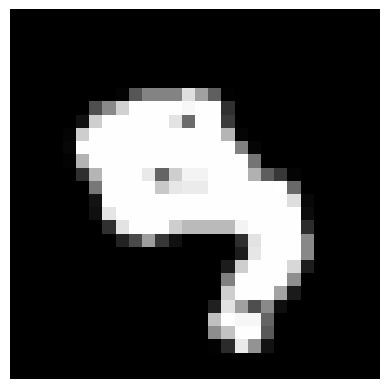

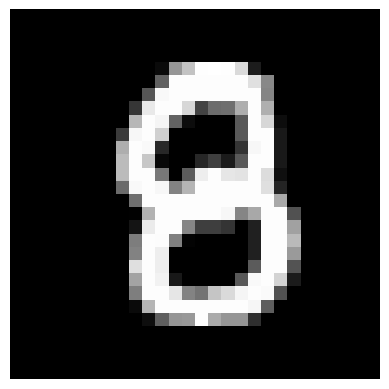

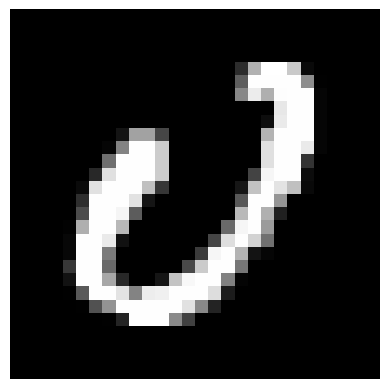

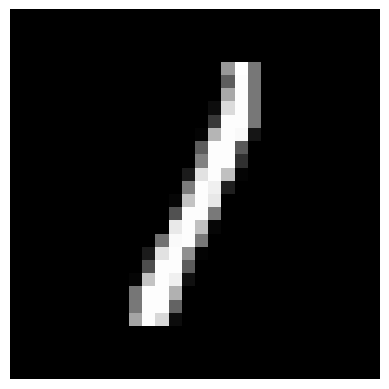

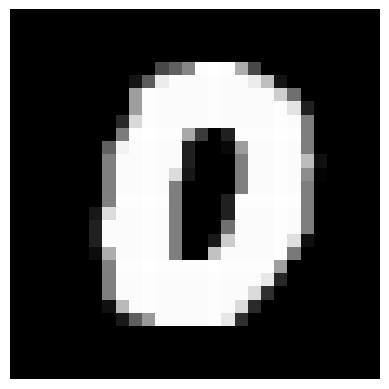

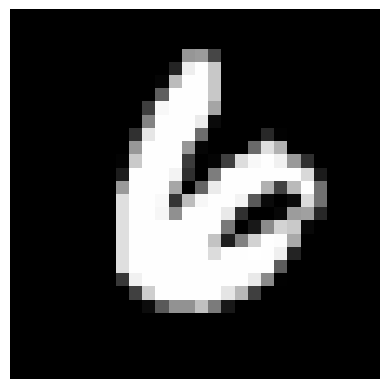

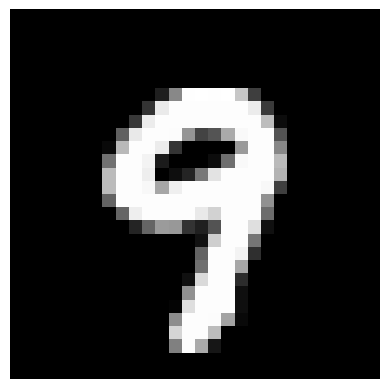

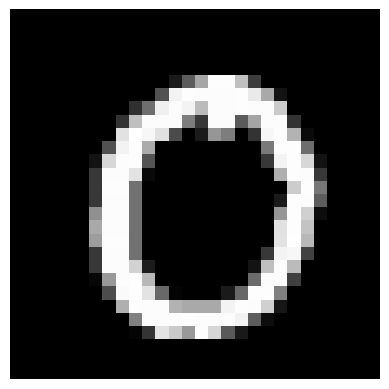

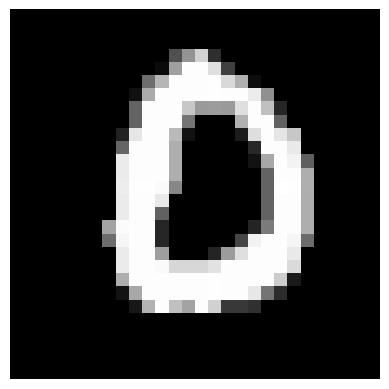

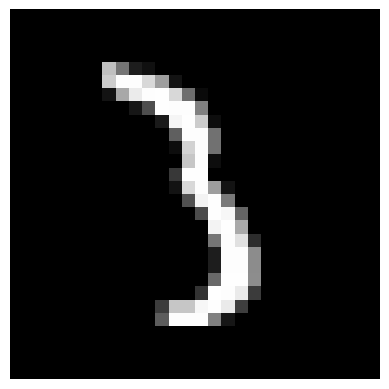

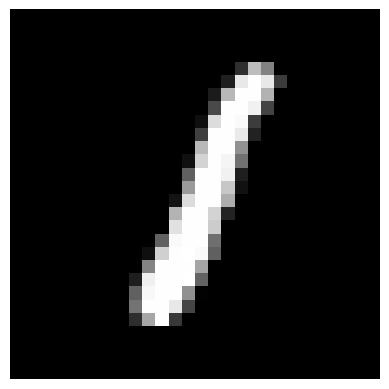

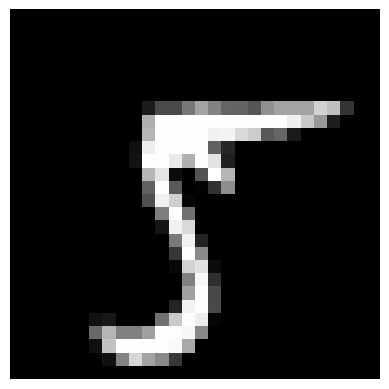

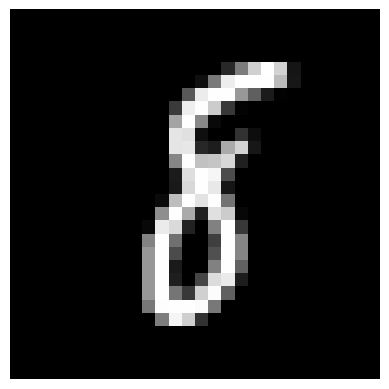

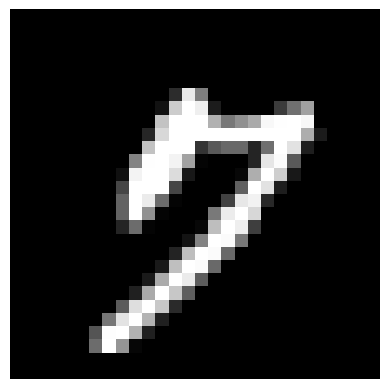

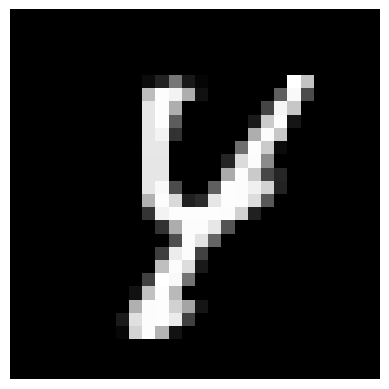

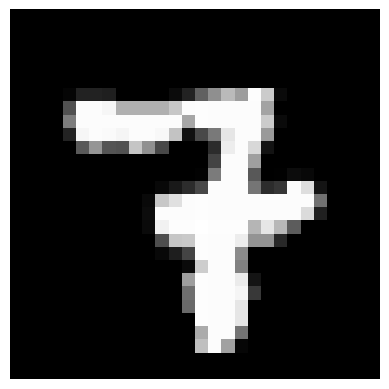

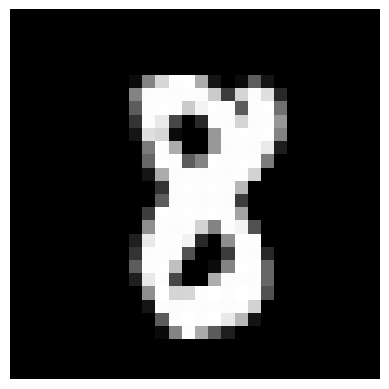

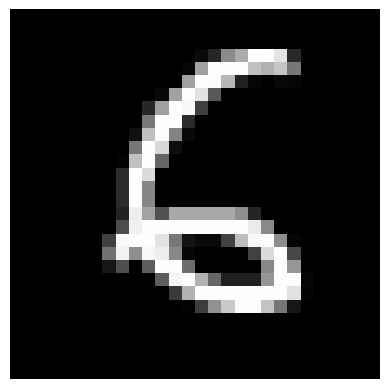

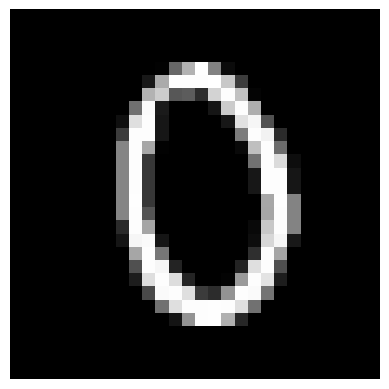

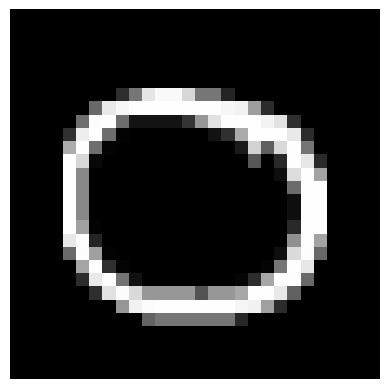

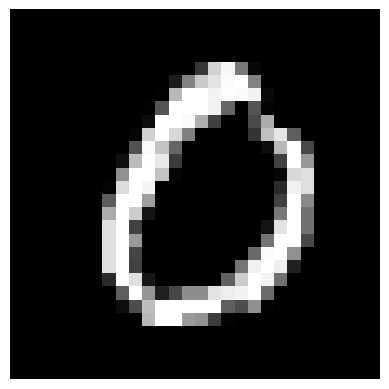

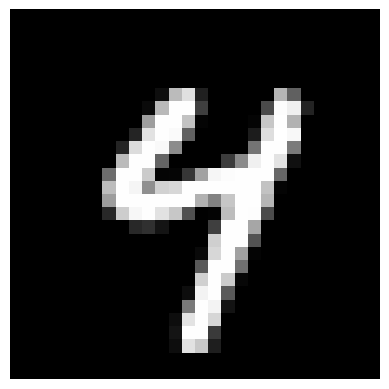

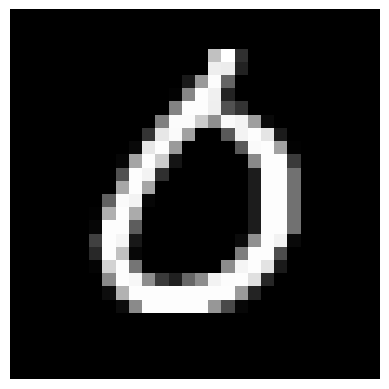

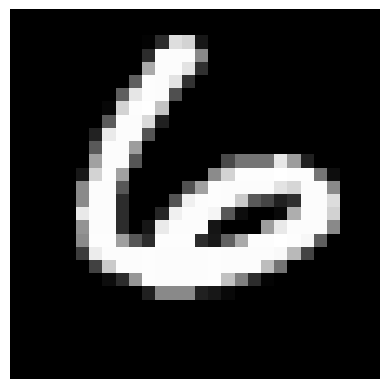

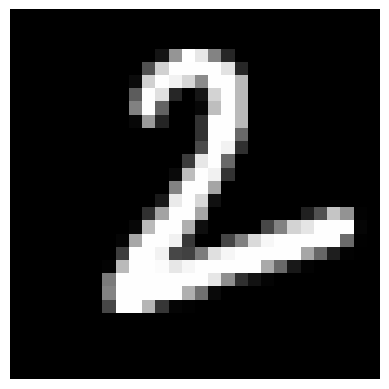

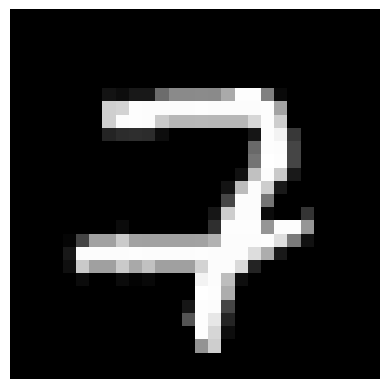

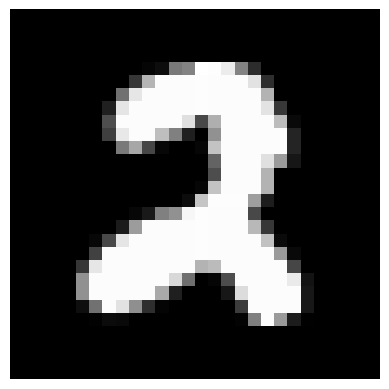

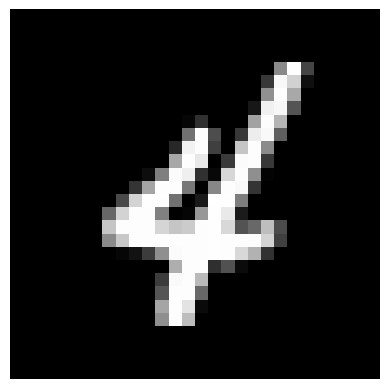

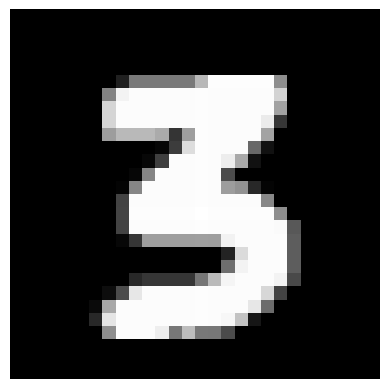

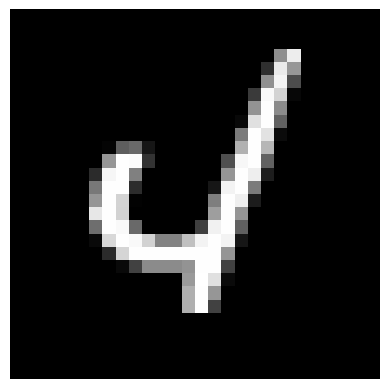

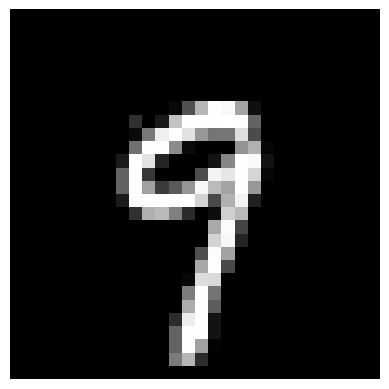

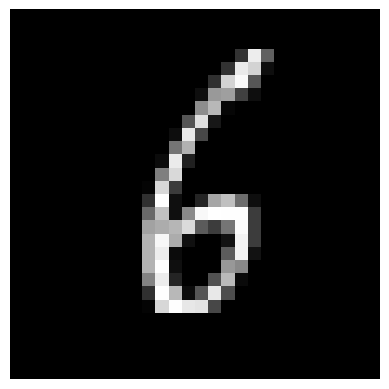

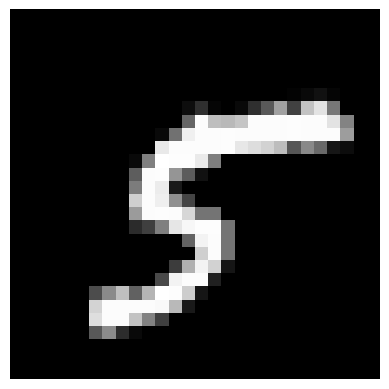

In [11]:
for fp in out[0]:
    visial(torch.Tensor(npy.load(fp)))

In [6]:
with open("output.txt", 'w') as f:
    for res in result:
        f.write(res[0] + " " + str(res[1]) + "\n")

In [7]:
alg_fuz = FuzzyAlgorithm(shuffle=False)
for epoch in range(epochs):
    alg.train(train_loader)
    wrong_pred,_ = alg.evaluate(val_loader)

100%|████████████████████████████████████████████████████████████████████| 938/938 [00:27<00:00, 33.98it/s]


Accuracy on the val set: 14 %


100%|████████████████████████████████████████████████████████████████████| 938/938 [00:29<00:00, 32.24it/s]


Accuracy on the val set: 17 %


100%|████████████████████████████████████████████████████████████████████| 938/938 [00:27<00:00, 34.68it/s]


Accuracy on the val set: 15 %


100%|████████████████████████████████████████████████████████████████████| 938/938 [00:27<00:00, 33.65it/s]


Accuracy on the val set: 21 %


100%|████████████████████████████████████████████████████████████████████| 938/938 [00:26<00:00, 35.25it/s]


Accuracy on the val set: 19 %


In [11]:
alg.model.eval()
correct = total = 0
test_loader = train_loader
with torch.no_grad():
    for data, labels in test_loader:
        # data = reduce(data)
        outputs = alg.model(data)
        _, predicted = torch.max(outputs.data, 1)
        # print(predicted, labels)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
#         wrong_pred[0].append(data[predicted != labels])
#         wrong_pred[1].append(predicted[predicted != labels])
#         wrong_pred[2].append(labels[predicted != labels])
accuracy = correct / total
print(accuracy)

0.7369166666666667


In [7]:
train_dataset4IRM1 = train_dataset[::2]
train_dataset4IRM2 = train_dataset[1::2]
val_dataset4IRM = val_dataset

train_loader4IRM1 = DataLoader(dataset=train_dataset4IRM1, batch_size=30000, shuffle=True)
train_loader4IRM2 = DataLoader(dataset=train_dataset4IRM2, batch_size=30000, shuffle=True)
val_loader = DataLoader(dataset=val_dataset, batch_size=100, shuffle=False)

In [8]:
loss_record = []
acc_record = []
alg_irm = IRM_MLP(penalty_weight=91483)
for epoches in tqdm(range(alg_irm.steps)):
    loss_record.extend(alg_irm.train_with_eval(train_loader4IRM1, train_loader4IRM2, val_loader))
    if epoches % 20 == 0:
        _, acc, _ = alg_irm.evaluate(val_loader)
        acc_record.append(acc)

  0%|▎                                                                                                                                                                          | 1/501 [00:01<10:35,  1.27s/it]

tensor([7, 7, 3, 1, 7, 3, 7, 7, 6, 3, 2, 2, 1, 7, 2, 1, 1, 7, 2, 1, 3, 1, 7, 8,
        8, 2, 9, 3, 1, 8, 1, 0, 1, 7, 2, 3, 2, 2, 0, 1, 7, 3, 3, 3, 1, 6, 3, 3,
        3, 3, 7, 0, 1, 1, 1, 1, 1, 3, 3, 8, 8, 1, 1, 1, 7, 7, 3, 1, 1, 8, 9, 9,
        1, 1, 0, 1, 2, 8, 3, 8, 7, 2, 3, 9, 8, 1, 1, 9, 1, 9, 1, 1, 2, 7, 9, 7,
        1, 7, 9, 6], device='cuda:0') tensor([3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 0, 0, 0, 0, 0,
        0, 0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
        9, 9, 9, 9, 9, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 6, 6, 6, 6, 6, 6, 6, 6,
        6, 8, 8, 8], device='cuda:0')
Accuracy on the val set: 11 %


  4%|███████▏                                                                                                                                                                  | 21/501 [00:13<04:57,  1.61it/s]

tensor([3, 1, 3, 7, 7, 3, 3, 4, 6, 3, 6, 7, 1, 1, 2, 3, 7, 3, 9, 1, 3, 7, 7, 2,
        7, 7, 1, 3, 6, 2, 1, 7, 7, 7, 2, 4, 7, 3, 0, 3, 3, 1, 1, 4, 3, 4, 9, 9,
        2, 3, 0, 1, 8, 1, 0, 2, 1, 2, 3, 8, 1, 0, 1, 1, 7, 2, 7, 1, 3, 1, 1, 8,
        8, 1, 9, 2, 3, 1, 3, 8, 7, 6, 1, 1, 8, 1, 2, 7, 1, 3, 8, 7, 2, 7, 8, 7,
        1, 7, 1, 7], device='cuda:0') tensor([3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 0, 0, 0, 0, 0,
        0, 0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
        9, 9, 9, 9, 9, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 6, 6, 6, 6, 6, 6, 6, 6,
        6, 8, 8, 8], device='cuda:0')
Accuracy on the val set: 14 %


  8%|█████████████▉                                                                                                                                                            | 41/501 [00:25<04:47,  1.60it/s]

tensor([3, 1, 3, 3, 7, 3, 1, 7, 7, 3, 1, 7, 1, 1, 1, 3, 3, 3, 0, 1, 3, 7, 3, 1,
        7, 1, 1, 1, 1, 1, 1, 7, 7, 1, 2, 7, 1, 3, 1, 3, 1, 1, 1, 3, 3, 3, 2, 1,
        1, 3, 0, 1, 1, 1, 0, 2, 1, 3, 1, 7, 1, 0, 1, 1, 7, 2, 1, 1, 3, 1, 1, 3,
        9, 1, 3, 1, 1, 1, 3, 1, 7, 7, 1, 1, 1, 1, 2, 7, 1, 3, 1, 2, 7, 5, 8, 7,
        1, 7, 1, 7], device='cuda:0') tensor([3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 0, 0, 0, 0, 0,
        0, 0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
        9, 9, 9, 9, 9, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 6, 6, 6, 6, 6, 6, 6, 6,
        6, 8, 8, 8], device='cuda:0')
Accuracy on the val set: 14 %


 12%|████████████████████▋                                                                                                                                                     | 61/501 [00:38<04:33,  1.61it/s]

tensor([3, 1, 9, 3, 7, 1, 1, 7, 1, 3, 1, 7, 1, 1, 1, 3, 3, 1, 0, 1, 3, 7, 3, 2,
        7, 1, 1, 1, 1, 1, 1, 7, 1, 1, 2, 7, 1, 3, 1, 3, 3, 1, 1, 3, 3, 1, 9, 1,
        1, 1, 0, 1, 1, 1, 0, 2, 1, 3, 1, 1, 1, 0, 1, 1, 7, 2, 1, 1, 3, 1, 1, 7,
        9, 1, 3, 1, 1, 1, 3, 1, 7, 7, 1, 1, 1, 1, 0, 7, 1, 3, 1, 7, 7, 5, 8, 7,
        1, 7, 1, 7], device='cuda:0') tensor([3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 0, 0, 0, 0, 0,
        0, 0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
        9, 9, 9, 9, 9, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 6, 6, 6, 6, 6, 6, 6, 6,
        6, 8, 8, 8], device='cuda:0')
Accuracy on the val set: 11 %


 16%|███████████████████████████▍                                                                                                                                              | 81/501 [00:51<04:31,  1.54it/s]

tensor([3, 1, 9, 3, 7, 1, 1, 7, 1, 3, 1, 7, 1, 1, 1, 3, 7, 1, 0, 1, 3, 7, 3, 2,
        7, 1, 1, 1, 1, 1, 1, 7, 1, 1, 2, 7, 1, 3, 1, 3, 3, 1, 1, 4, 3, 4, 9, 1,
        1, 1, 0, 1, 9, 1, 0, 2, 1, 3, 1, 1, 7, 0, 1, 1, 7, 2, 1, 1, 3, 1, 1, 7,
        9, 1, 1, 1, 1, 1, 3, 1, 7, 7, 1, 1, 1, 1, 0, 7, 1, 3, 1, 7, 1, 7, 8, 7,
        1, 7, 1, 7], device='cuda:0') tensor([3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 0, 0, 0, 0, 0,
        0, 0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
        9, 9, 9, 9, 9, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 6, 6, 6, 6, 6, 6, 6, 6,
        6, 8, 8, 8], device='cuda:0')
Accuracy on the val set: 11 %


 20%|██████████████████████████████████                                                                                                                                       | 101/501 [01:03<04:14,  1.57it/s]

tensor([3, 1, 9, 3, 7, 1, 1, 7, 1, 3, 1, 7, 1, 1, 1, 3, 7, 1, 0, 1, 3, 7, 3, 2,
        7, 1, 1, 1, 1, 1, 1, 7, 1, 7, 2, 7, 1, 3, 1, 3, 3, 1, 1, 7, 3, 4, 9, 1,
        1, 1, 0, 1, 9, 1, 0, 2, 1, 3, 3, 1, 7, 0, 1, 1, 7, 2, 1, 7, 3, 1, 1, 7,
        9, 1, 1, 1, 1, 1, 3, 1, 7, 6, 1, 1, 1, 1, 7, 7, 1, 3, 1, 7, 1, 7, 1, 7,
        1, 7, 1, 7], device='cuda:0') tensor([3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 0, 0, 0, 0, 0,
        0, 0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
        9, 9, 9, 9, 9, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 6, 6, 6, 6, 6, 6, 6, 6,
        6, 8, 8, 8], device='cuda:0')
Accuracy on the val set: 12 %


 24%|████████████████████████████████████████▊                                                                                                                                | 121/501 [01:16<03:53,  1.63it/s]

tensor([3, 1, 9, 3, 7, 2, 7, 7, 7, 3, 1, 7, 1, 1, 1, 3, 7, 1, 0, 1, 3, 7, 3, 2,
        7, 1, 1, 1, 1, 1, 1, 7, 1, 7, 2, 7, 1, 3, 1, 3, 3, 1, 1, 7, 3, 1, 9, 1,
        1, 1, 0, 1, 1, 1, 0, 2, 1, 3, 3, 7, 7, 0, 1, 1, 7, 2, 1, 7, 1, 1, 1, 7,
        9, 1, 2, 1, 1, 1, 3, 1, 7, 6, 1, 1, 1, 1, 7, 7, 1, 3, 1, 7, 1, 7, 1, 7,
        1, 7, 1, 7], device='cuda:0') tensor([3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 0, 0, 0, 0, 0,
        0, 0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
        9, 9, 9, 9, 9, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 6, 6, 6, 6, 6, 6, 6, 6,
        6, 8, 8, 8], device='cuda:0')
Accuracy on the val set: 12 %


 28%|███████████████████████████████████████████████▌                                                                                                                         | 141/501 [01:29<04:04,  1.47it/s]

tensor([3, 1, 9, 3, 7, 2, 7, 7, 7, 3, 1, 7, 1, 1, 1, 3, 7, 1, 0, 1, 3, 7, 3, 2,
        7, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 7, 1, 3, 1, 3, 1, 1, 1, 7, 3, 1, 9, 9,
        1, 1, 0, 1, 1, 1, 1, 2, 1, 3, 1, 1, 7, 0, 1, 1, 7, 2, 1, 7, 1, 1, 1, 7,
        9, 1, 2, 1, 1, 1, 3, 1, 7, 6, 1, 1, 1, 1, 7, 7, 1, 3, 1, 7, 1, 7, 1, 7,
        2, 7, 1, 7], device='cuda:0') tensor([3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 0, 0, 0, 0, 0,
        0, 0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
        9, 9, 9, 9, 9, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 6, 6, 6, 6, 6, 6, 6, 6,
        6, 8, 8, 8], device='cuda:0')
Accuracy on the val set: 10 %


 32%|██████████████████████████████████████████████████████▎                                                                                                                  | 161/501 [01:41<03:48,  1.49it/s]

tensor([3, 1, 9, 3, 7, 2, 7, 7, 1, 3, 1, 7, 1, 1, 1, 1, 7, 1, 0, 1, 3, 7, 3, 2,
        7, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 7, 1, 3, 1, 3, 1, 1, 1, 7, 3, 1, 9, 1,
        1, 3, 0, 1, 1, 1, 1, 1, 1, 3, 1, 7, 7, 0, 1, 1, 7, 2, 1, 7, 1, 1, 1, 7,
        9, 1, 1, 1, 1, 1, 3, 1, 7, 6, 1, 1, 1, 1, 7, 7, 1, 3, 1, 7, 1, 7, 1, 7,
        2, 7, 1, 7], device='cuda:0') tensor([3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 0, 0, 0, 0, 0,
        0, 0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
        9, 9, 9, 9, 9, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 6, 6, 6, 6, 6, 6, 6, 6,
        6, 8, 8, 8], device='cuda:0')
Accuracy on the val set: 10 %


 36%|█████████████████████████████████████████████████████████████                                                                                                            | 181/501 [01:55<03:35,  1.48it/s]

tensor([3, 1, 9, 3, 7, 2, 7, 7, 7, 3, 1, 7, 1, 1, 1, 1, 7, 1, 0, 1, 3, 7, 3, 2,
        7, 1, 1, 1, 1, 1, 1, 1, 1, 7, 2, 7, 1, 3, 1, 3, 3, 1, 1, 7, 3, 1, 9, 1,
        1, 3, 0, 1, 1, 1, 1, 1, 1, 3, 1, 7, 7, 0, 1, 1, 7, 2, 1, 7, 1, 1, 1, 7,
        9, 1, 1, 1, 1, 1, 3, 1, 7, 6, 1, 1, 1, 1, 7, 7, 1, 3, 1, 7, 1, 7, 1, 7,
        2, 7, 1, 7], device='cuda:0') tensor([3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 0, 0, 0, 0, 0,
        0, 0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
        9, 9, 9, 9, 9, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 6, 6, 6, 6, 6, 6, 6, 6,
        6, 8, 8, 8], device='cuda:0')
Accuracy on the val set: 11 %


 40%|███████████████████████████████████████████████████████████████████▊                                                                                                     | 201/501 [02:08<03:28,  1.44it/s]

tensor([3, 1, 2, 3, 7, 2, 7, 7, 7, 3, 1, 7, 1, 1, 1, 1, 7, 3, 0, 1, 3, 7, 3, 2,
        7, 1, 1, 1, 1, 1, 1, 1, 1, 7, 2, 7, 1, 3, 1, 3, 3, 1, 1, 7, 1, 1, 2, 1,
        1, 3, 0, 1, 1, 1, 1, 1, 1, 3, 1, 7, 7, 0, 1, 1, 7, 2, 1, 7, 1, 1, 1, 7,
        9, 1, 1, 1, 1, 1, 3, 1, 7, 6, 1, 1, 1, 1, 7, 7, 1, 3, 1, 7, 1, 7, 1, 7,
        2, 7, 1, 7], device='cuda:0') tensor([3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 0, 0, 0, 0, 0,
        0, 0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
        9, 9, 9, 9, 9, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 6, 6, 6, 6, 6, 6, 6, 6,
        6, 8, 8, 8], device='cuda:0')
Accuracy on the val set: 11 %


 44%|██████████████████████████████████████████████████████████████████████████▌                                                                                              | 221/501 [02:22<03:04,  1.52it/s]

tensor([3, 1, 9, 3, 7, 2, 7, 7, 7, 3, 1, 7, 1, 1, 1, 1, 7, 7, 0, 1, 3, 7, 3, 2,
        7, 1, 1, 1, 1, 1, 1, 1, 1, 7, 2, 7, 1, 3, 1, 3, 3, 1, 1, 4, 1, 1, 2, 1,
        1, 3, 0, 1, 1, 1, 1, 1, 1, 3, 1, 1, 7, 0, 1, 1, 7, 2, 1, 7, 1, 1, 1, 7,
        9, 1, 1, 1, 1, 1, 1, 1, 7, 6, 1, 1, 1, 1, 7, 7, 1, 3, 1, 7, 1, 7, 1, 7,
        2, 7, 1, 7], device='cuda:0') tensor([3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 0, 0, 0, 0, 0,
        0, 0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
        9, 9, 9, 9, 9, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 6, 6, 6, 6, 6, 6, 6, 6,
        6, 8, 8, 8], device='cuda:0')
Accuracy on the val set: 12 %


 48%|█████████████████████████████████████████████████████████████████████████████████▎                                                                                       | 241/501 [02:35<02:53,  1.50it/s]

tensor([3, 1, 9, 3, 7, 2, 7, 7, 7, 3, 1, 7, 1, 1, 1, 1, 7, 7, 0, 1, 3, 7, 7, 2,
        7, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 7, 1, 3, 1, 1, 3, 1, 1, 7, 1, 1, 2, 1,
        1, 3, 0, 1, 1, 1, 1, 1, 1, 3, 1, 1, 7, 0, 1, 1, 7, 2, 1, 7, 3, 1, 1, 7,
        9, 1, 1, 1, 1, 1, 1, 1, 7, 6, 1, 1, 1, 1, 7, 7, 1, 3, 1, 7, 1, 7, 1, 7,
        2, 7, 1, 7], device='cuda:0') tensor([3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 0, 0, 0, 0, 0,
        0, 0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
        9, 9, 9, 9, 9, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 6, 6, 6, 6, 6, 6, 6, 6,
        6, 8, 8, 8], device='cuda:0')
Accuracy on the val set: 11 %


 52%|████████████████████████████████████████████████████████████████████████████████████████                                                                                 | 261/501 [02:49<02:42,  1.48it/s]

tensor([3, 1, 2, 3, 7, 2, 7, 7, 7, 3, 1, 7, 1, 1, 1, 1, 1, 1, 0, 1, 3, 7, 3, 2,
        7, 1, 1, 1, 1, 2, 1, 1, 1, 7, 2, 7, 1, 3, 1, 1, 3, 1, 1, 7, 1, 1, 2, 1,
        1, 3, 0, 1, 1, 1, 0, 1, 1, 3, 1, 1, 7, 0, 1, 1, 7, 2, 1, 7, 1, 1, 1, 7,
        9, 1, 1, 1, 1, 1, 1, 1, 7, 6, 1, 1, 1, 1, 7, 7, 1, 3, 1, 7, 1, 7, 1, 7,
        2, 7, 1, 7], device='cuda:0') tensor([3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 0, 0, 0, 0, 0,
        0, 0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
        9, 9, 9, 9, 9, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 6, 6, 6, 6, 6, 6, 6, 6,
        6, 8, 8, 8], device='cuda:0')
Accuracy on the val set: 12 %


 56%|██████████████████████████████████████████████████████████████████████████████████████████████▊                                                                          | 281/501 [03:03<02:30,  1.47it/s]

tensor([3, 1, 2, 3, 7, 2, 7, 7, 7, 3, 1, 7, 1, 1, 1, 1, 1, 1, 0, 1, 3, 7, 3, 1,
        7, 1, 1, 1, 1, 1, 1, 1, 1, 7, 2, 7, 1, 3, 1, 1, 3, 1, 1, 7, 1, 1, 2, 7,
        1, 3, 0, 1, 1, 1, 0, 2, 1, 3, 1, 1, 7, 0, 1, 1, 7, 2, 1, 7, 1, 1, 1, 7,
        9, 1, 1, 1, 1, 1, 1, 1, 7, 6, 1, 1, 1, 1, 7, 7, 1, 3, 1, 2, 1, 7, 1, 7,
        2, 7, 1, 7], device='cuda:0') tensor([3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 0, 0, 0, 0, 0,
        0, 0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
        9, 9, 9, 9, 9, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 6, 6, 6, 6, 6, 6, 6, 6,
        6, 8, 8, 8], device='cuda:0')
Accuracy on the val set: 12 %


 60%|█████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                   | 301/501 [03:16<02:15,  1.47it/s]

tensor([3, 1, 7, 7, 7, 7, 7, 7, 7, 3, 1, 7, 1, 1, 1, 1, 1, 7, 0, 1, 3, 7, 3, 1,
        7, 1, 1, 1, 1, 1, 1, 1, 1, 7, 2, 7, 1, 1, 1, 1, 3, 1, 1, 7, 1, 1, 9, 1,
        1, 1, 0, 1, 1, 1, 1, 2, 1, 3, 1, 7, 7, 0, 1, 1, 7, 2, 1, 7, 1, 1, 1, 7,
        9, 1, 1, 1, 1, 1, 1, 1, 7, 6, 1, 1, 1, 1, 2, 7, 1, 3, 1, 2, 1, 7, 1, 7,
        2, 7, 1, 7], device='cuda:0') tensor([3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 0, 0, 0, 0, 0,
        0, 0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
        9, 9, 9, 9, 9, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 6, 6, 6, 6, 6, 6, 6, 6,
        6, 8, 8, 8], device='cuda:0')
Accuracy on the val set: 11 %


 64%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                            | 321/501 [03:30<02:10,  1.37it/s]

tensor([1, 1, 2, 7, 7, 2, 7, 7, 7, 3, 1, 7, 1, 1, 1, 1, 1, 7, 0, 1, 3, 7, 3, 1,
        7, 1, 1, 1, 1, 1, 1, 1, 1, 7, 2, 7, 1, 1, 1, 1, 1, 1, 1, 7, 1, 1, 2, 1,
        1, 1, 0, 1, 1, 1, 1, 2, 7, 3, 1, 7, 7, 0, 1, 1, 7, 2, 1, 7, 1, 1, 1, 7,
        9, 7, 1, 1, 1, 1, 1, 1, 7, 6, 1, 1, 1, 1, 2, 7, 1, 3, 1, 7, 1, 7, 1, 7,
        2, 7, 1, 7], device='cuda:0') tensor([3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 0, 0, 0, 0, 0,
        0, 0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
        9, 9, 9, 9, 9, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 6, 6, 6, 6, 6, 6, 6, 6,
        6, 8, 8, 8], device='cuda:0')
Accuracy on the val set: 10 %


 68%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                      | 341/501 [03:42<01:37,  1.65it/s]

tensor([1, 1, 2, 7, 7, 2, 7, 7, 7, 3, 7, 7, 1, 1, 1, 1, 1, 7, 0, 1, 3, 7, 7, 1,
        7, 1, 1, 1, 1, 2, 7, 1, 1, 7, 7, 7, 1, 1, 1, 1, 1, 1, 1, 7, 1, 1, 2, 1,
        1, 3, 0, 1, 1, 1, 0, 2, 1, 3, 1, 7, 7, 0, 1, 1, 7, 2, 1, 7, 1, 1, 1, 7,
        9, 1, 1, 1, 1, 1, 1, 1, 7, 6, 1, 1, 1, 1, 2, 7, 1, 3, 1, 2, 1, 7, 8, 7,
        2, 7, 1, 7], device='cuda:0') tensor([3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 0, 0, 0, 0, 0,
        0, 0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
        9, 9, 9, 9, 9, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 6, 6, 6, 6, 6, 6, 6, 6,
        6, 8, 8, 8], device='cuda:0')
Accuracy on the val set: 12 %


 72%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                               | 361/501 [03:55<01:34,  1.48it/s]

tensor([1, 1, 7, 7, 7, 7, 1, 7, 7, 3, 7, 7, 1, 1, 1, 1, 1, 1, 0, 1, 3, 7, 7, 1,
        7, 1, 1, 1, 1, 1, 7, 1, 1, 7, 7, 7, 1, 1, 1, 1, 1, 1, 1, 7, 1, 1, 2, 1,
        1, 1, 0, 1, 1, 1, 0, 2, 1, 3, 1, 7, 7, 0, 1, 1, 7, 2, 1, 7, 1, 1, 1, 7,
        9, 1, 1, 2, 1, 1, 1, 1, 7, 6, 1, 1, 1, 1, 7, 7, 1, 3, 1, 7, 1, 7, 1, 7,
        2, 7, 1, 7], device='cuda:0') tensor([3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 0, 0, 0, 0, 0,
        0, 0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
        9, 9, 9, 9, 9, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 6, 6, 6, 6, 6, 6, 6, 6,
        6, 8, 8, 8], device='cuda:0')
Accuracy on the val set: 12 %


 76%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                        | 381/501 [04:08<01:20,  1.48it/s]

tensor([1, 1, 7, 7, 7, 7, 1, 7, 7, 3, 7, 7, 1, 1, 1, 1, 7, 1, 0, 1, 3, 7, 7, 1,
        7, 1, 1, 1, 1, 1, 7, 1, 1, 7, 2, 7, 1, 1, 1, 1, 1, 1, 1, 7, 1, 1, 2, 1,
        1, 1, 0, 1, 1, 1, 0, 2, 1, 3, 1, 7, 7, 0, 1, 1, 7, 2, 1, 7, 1, 1, 1, 7,
        9, 1, 1, 2, 1, 1, 1, 1, 7, 6, 1, 1, 1, 1, 7, 7, 1, 3, 1, 2, 1, 7, 1, 7,
        2, 7, 1, 7], device='cuda:0') tensor([3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 0, 0, 0, 0, 0,
        0, 0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
        9, 9, 9, 9, 9, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 6, 6, 6, 6, 6, 6, 6, 6,
        6, 8, 8, 8], device='cuda:0')
Accuracy on the val set: 11 %


 80%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 401/501 [04:22<01:07,  1.48it/s]

tensor([1, 1, 7, 7, 7, 7, 1, 7, 7, 3, 7, 7, 1, 1, 1, 1, 7, 7, 0, 1, 3, 7, 7, 1,
        7, 1, 1, 1, 1, 2, 7, 7, 1, 7, 7, 7, 1, 1, 1, 3, 1, 1, 1, 4, 1, 1, 1, 1,
        1, 3, 0, 1, 1, 1, 0, 2, 9, 3, 1, 7, 7, 0, 1, 1, 7, 2, 1, 7, 1, 1, 1, 6,
        9, 1, 1, 2, 1, 1, 1, 1, 7, 6, 1, 1, 1, 1, 7, 7, 1, 3, 1, 2, 1, 7, 1, 7,
        2, 7, 1, 7], device='cuda:0') tensor([3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 0, 0, 0, 0, 0,
        0, 0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
        9, 9, 9, 9, 9, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 6, 6, 6, 6, 6, 6, 6, 6,
        6, 8, 8, 8], device='cuda:0')
Accuracy on the val set: 13 %


 84%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                           | 421/501 [04:35<00:53,  1.48it/s]

tensor([1, 1, 7, 7, 7, 7, 1, 7, 7, 3, 7, 7, 1, 1, 1, 1, 7, 7, 0, 1, 3, 7, 7, 1,
        7, 1, 1, 1, 1, 2, 7, 7, 1, 7, 2, 7, 1, 1, 1, 3, 1, 1, 1, 7, 1, 1, 2, 1,
        1, 3, 0, 1, 1, 1, 0, 2, 9, 3, 1, 7, 7, 0, 1, 1, 7, 2, 1, 7, 1, 1, 1, 6,
        9, 1, 1, 2, 1, 1, 1, 1, 7, 7, 1, 1, 1, 1, 7, 7, 1, 3, 1, 2, 1, 7, 1, 7,
        2, 7, 1, 7], device='cuda:0') tensor([3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 0, 0, 0, 0, 0,
        0, 0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
        9, 9, 9, 9, 9, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 6, 6, 6, 6, 6, 6, 6, 6,
        6, 8, 8, 8], device='cuda:0')
Accuracy on the val set: 12 %


 88%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                    | 441/501 [04:49<00:40,  1.48it/s]

tensor([1, 1, 7, 7, 7, 7, 1, 7, 7, 3, 7, 7, 1, 1, 1, 3, 7, 7, 0, 1, 3, 7, 7, 1,
        7, 1, 1, 1, 1, 1, 7, 7, 1, 7, 2, 7, 1, 1, 1, 1, 1, 1, 1, 7, 1, 1, 2, 1,
        1, 3, 0, 1, 1, 1, 1, 9, 9, 3, 1, 7, 7, 0, 1, 1, 7, 2, 1, 7, 1, 1, 1, 7,
        9, 1, 1, 2, 1, 1, 1, 1, 7, 7, 1, 1, 1, 1, 7, 7, 1, 3, 1, 2, 1, 7, 1, 7,
        2, 7, 1, 7], device='cuda:0') tensor([3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 0, 0, 0, 0, 0,
        0, 0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
        9, 9, 9, 9, 9, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 6, 6, 6, 6, 6, 6, 6, 6,
        6, 8, 8, 8], device='cuda:0')
Accuracy on the val set: 12 %


 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌             | 461/501 [05:02<00:27,  1.47it/s]

tensor([1, 1, 7, 7, 7, 7, 1, 7, 1, 3, 1, 7, 1, 1, 1, 1, 7, 7, 0, 1, 3, 7, 1, 1,
        7, 1, 1, 1, 1, 1, 7, 7, 1, 1, 2, 7, 1, 1, 1, 1, 1, 1, 1, 7, 1, 1, 2, 1,
        1, 3, 0, 1, 1, 1, 1, 9, 9, 3, 1, 7, 7, 0, 1, 1, 7, 2, 1, 7, 1, 1, 1, 7,
        9, 1, 1, 2, 1, 1, 1, 1, 7, 7, 1, 1, 1, 1, 7, 7, 1, 3, 1, 2, 1, 7, 1, 7,
        2, 7, 1, 7], device='cuda:0') tensor([3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 0, 0, 0, 0, 0,
        0, 0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
        9, 9, 9, 9, 9, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 6, 6, 6, 6, 6, 6, 6, 6,
        6, 8, 8, 8], device='cuda:0')
Accuracy on the val set: 11 %


 96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎      | 481/501 [05:16<00:13,  1.48it/s]

tensor([1, 1, 7, 7, 7, 7, 1, 7, 1, 3, 1, 7, 1, 1, 1, 1, 7, 1, 0, 1, 3, 7, 1, 1,
        7, 1, 1, 1, 1, 1, 7, 7, 1, 1, 2, 7, 1, 1, 1, 1, 1, 1, 1, 9, 1, 1, 3, 1,
        1, 3, 0, 1, 1, 1, 1, 2, 9, 3, 1, 7, 7, 0, 1, 1, 7, 2, 1, 7, 1, 1, 1, 7,
        9, 1, 1, 2, 1, 1, 1, 1, 7, 7, 1, 1, 1, 1, 7, 7, 1, 3, 1, 2, 1, 7, 1, 7,
        2, 7, 1, 7], device='cuda:0') tensor([3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 0, 0, 0, 0, 0,
        0, 0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
        9, 9, 9, 9, 9, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 6, 6, 6, 6, 6, 6, 6, 6,
        6, 8, 8, 8], device='cuda:0')
Accuracy on the val set: 11 %


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 501/501 [05:30<00:00,  1.52it/s]

tensor([1, 1, 7, 7, 7, 7, 1, 7, 1, 3, 1, 7, 1, 1, 1, 1, 7, 7, 0, 1, 3, 7, 7, 1,
        7, 1, 1, 1, 1, 1, 7, 7, 1, 7, 2, 7, 1, 1, 1, 1, 1, 1, 1, 9, 1, 1, 3, 1,
        1, 3, 7, 1, 1, 1, 1, 1, 1, 3, 1, 7, 7, 0, 1, 1, 7, 2, 1, 7, 1, 1, 1, 7,
        9, 1, 1, 2, 1, 1, 1, 1, 7, 7, 1, 1, 1, 1, 7, 7, 1, 3, 1, 7, 1, 7, 1, 7,
        2, 7, 1, 7], device='cuda:0') tensor([3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 0, 0, 0, 0, 0,
        0, 0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
        9, 9, 9, 9, 9, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 6, 6, 6, 6, 6, 6, 6, 6,
        6, 8, 8, 8], device='cuda:0')
Accuracy on the val set: 12 %


In [9]:
alg_irm.model

MLP(
  (_main): Sequential(
    (0): Dropout(p=0.3, inplace=False)
    (1): Linear(in_features=7840, out_features=784, bias=True)
    (2): ReLU(inplace=True)
    (3): Linear(in_features=784, out_features=784, bias=True)
    (4): ReLU(inplace=True)
    (5): Linear(in_features=784, out_features=784, bias=True)
    (6): ReLU(inplace=True)
    (7): Linear(in_features=784, out_features=10, bias=True)
  )
)

In [34]:
with open("output_tofu1.txt", 'r') as f:
    content = f.read()
    
result_tofu = {}
for line in content.split("\n"):
    temp = line.split()
    result_tofu.update({temp[0]: temp[1]})

result_fuzzy = {}
with open("output_reduce.txt", 'r') as f:
    content = f.read()
for line in content.split("\n"):
    temp = line.split()
    result_fuzzy.update({temp[0]: temp[1]})
    
cnt = 0
for key in result_tofu.keys():
    if result_tofu[key] != result_fuzzy[key]:
        cnt += 1
        
cnt

1183

In [18]:
result_tofu = list(zip(result_tofu.keys(), result_tofu.values()))

In [22]:
result_tofu = sorted(result_tofu, key=lambda x: int(x[0].split('.')[0]))
with open("result.txt", 'w') as f:
    for res in result_tofu:
        f.write(res[0] + " " + res[1] + "\n")